In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Customer-Churn-Prediction.csv')
#print(df.to_string())

In [73]:
#print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [9]:
#print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
print(df.duplicated().sum())

0


In [6]:
#Number of Distinct values in each columns
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [3]:
#MultipleLines Column contains "NO Phone Service", mapping it to "No"
df['MultipleLines'] = df['MultipleLines'].map({"Yes":"Yes", "No":"No", "No phone service":"No"})

In [8]:
#Now MultipleLines contains 2 distinct values only
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [9]:
print(df['MultipleLines'].head())

0    No
1    No
2    No
3    No
4    No
Name: MultipleLines, dtype: object


In [10]:
#Printing min and max values from tenure
print(df['tenure'].min())
print(df['tenure'].max())

0
72


In [4]:
#Creating a new column "tenure_group" and inserting it.
tenure_group=[]
for i in df['tenure']:
    if(i<=12):
        tenure_group.append('0-12')
    elif(i<=24):
        tenure_group.append('13-24')
    elif(i<=48):
        tenure_group.append('25-48')
    elif(i<=60):
        tenure_group.append('49-60')
    else:
        tenure_group.append('>60')

In [5]:
import numpy as np
tenure_group=np.array(tenure_group)

In [6]:
df['tenure_group']=tenure_group

In [14]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
tenure_group           5
dtype: int64


In [4]:
#SeniorCitizen has '0' or '1', mapping to 'Yes' or 'No'
df['SeniorCitizen']=df['SeniorCitizen'].map({0:"No", 1:"Yes"})

In [16]:
print(df.head())

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No             DSL             No  ...          No          No   
1            No             DSL            Yes  ...          No          No   
2            No             DSL            Yes  ...          No          No   
3            No             DSL            Yes  ...         Yes          No   
4            No     Fiber optic             No  ...          No          No   

  StreamingMovies        Contract PaperlessBilling

In [5]:
#Dropping CustomerId and tenure
df.drop(['customerID'], inplace=True, axis=1)
#df.drop(['tenure'], inplace=True, axis=1)
print(df.head())

   gender SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines  \
0  Female            No     Yes         No       1           No            No   
1    Male            No      No         No      34          Yes            No   
2    Male            No      No         No       2          Yes            No   
3    Male            No      No         No      45           No            No   
4  Female            No      No         No       2          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contrac

In [6]:
#Churn from 'yes' or 'no' to '1' or '0'
df['Churn']=df['Churn'].map({'Yes':1, 'No':0})
print(df['Churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [82]:
#Correlation Matrix between two numeric variables i.e. monthly charges and total charges
mo=df['MonthlyCharges']
to=df['TotalCharges']
# corr=monthlyCharges.corr(totalCharges)
# print(corr)
print(mo.head())
print(to.head())

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object


In [83]:
#Since both are of different data types we first typecast totalCharges to float64
print(df.dtypes)

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
tenure_group         object
dtype: object


In [7]:
#Checking whehter TotalCharges containes any value that cannot be typecasted into float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce') 
#Coerce simply convert non changeable values to NaN to avoid errors

In [29]:
#There are 11 values which cannot be converted to Float
print(df['TotalCharges'].isna().sum())

11


In [8]:
#We drop those rows
df=df.drop(index=df[df['TotalCharges'].isna()].index)
print(df['TotalCharges'].isna().sum())

0


In [37]:
print(df.dtypes)

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
tenure_group         object
dtype: object


In [87]:
#Calculating Correlation
mo=df['MonthlyCharges']
to=df['TotalCharges']
corr=to.corr(mo)
print(corr)
#Correlation coeff == 1 implies strong positive correlation, -1 implies strong negative correlation, 0 implies no correlation
#Since it came out to be 0.65 which implies weakly correlated we are gonna keep both variables

0.6510648032262024


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

ValueError: could not convert string to float: 'Female'

In [42]:
#Data Visualization
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gender Frequency')

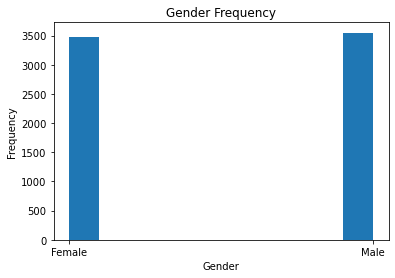

In [56]:
plt.hist(df['gender'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Frequency')

Text(0.5, 1.0, 'Age Frequency')

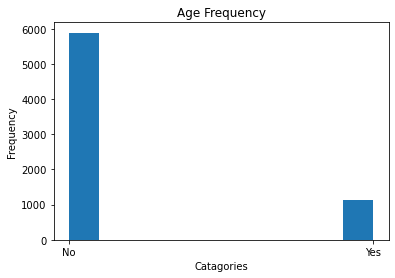

In [57]:
plt.hist(df['SeniorCitizen'])
plt.xlabel('Catagories')
plt.ylabel('Frequency')
plt.title('Age Frequency')

Text(0.5, 1.0, 'Contract Frequency')

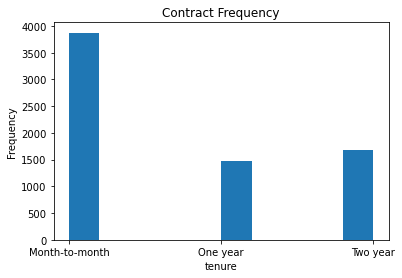

In [58]:
plt.hist(df['Contract'])
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.title('Contract Frequency')

Text(0.5, 1.0, 'Internet Service Frequency')

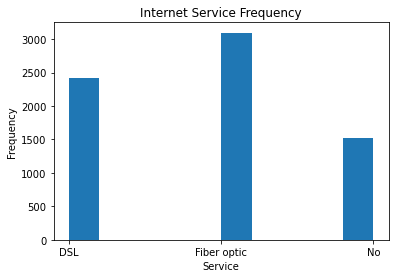

In [59]:
plt.hist(df['InternetService'])
plt.xlabel('Service')
plt.ylabel('Frequency')
plt.title('Internet Service Frequency')

Text(0.5, 1.0, 'Security Frequency')

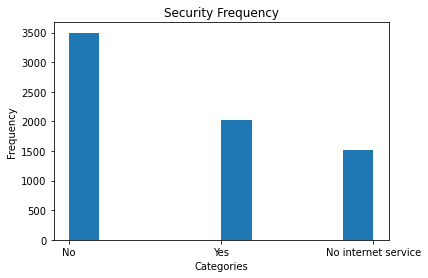

In [60]:
plt.hist(df['OnlineSecurity'])
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Security Frequency')

Text(0.5, 1.0, 'Method Frequency')

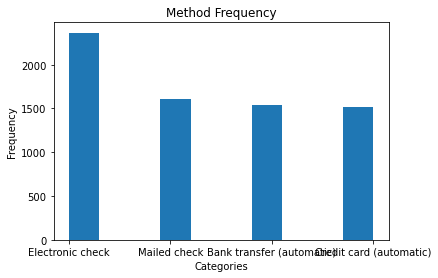

In [61]:
plt.hist(df['PaymentMethod'])
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Method Frequency')

Text(0.5, 1.0, 'Group Frequency')

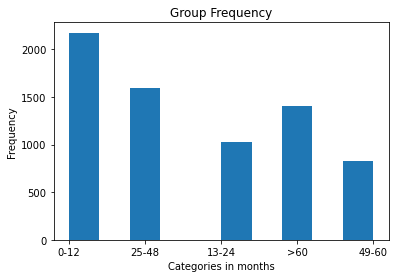

In [65]:
plt.hist(df['tenure_group'])
plt.xlabel('Categories in months')
plt.ylabel('Frequency')
plt.title('Group Frequency')

Text(0.5, 1.0, 'Churn Frequency')

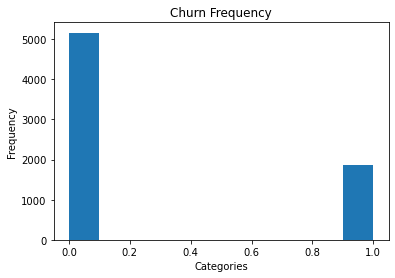

In [66]:
plt.hist(df['Churn'])
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Churn Frequency')

In [9]:
#Splitting the data in Training and Testing
from sklearn.model_selection import train_test_split as tts
x=df.drop('Churn', axis=1)     #Only Features
y=df['Churn']                  #Target Variable

In [11]:
#Standardizing the numerical Inputs to Improve the Accuracy of the Model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x['TotalCharges'] = scaler.fit_transform(x['TotalCharges'])

ValueError: Expected 2D array, got 1D array instead:
array=[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
#Categorical Data must be coverted into dummy variables before getting feeded into the model
x=pd.get_dummies(x, drop_first=True)

In [11]:
x_train, x_test, y_train, y_test=tts(x, y, test_size=0.2, random_state=90)

In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Creating Model
logit=LogisticRegression()
#Fitting the training data to the Model
logit.fit(x_train, y_train)
logit_acc=logit.score(x_test, y_test)
print("Accuracy of Logistic Regression Model = ", logit_acc)

Accuracy of Logistic Regression Model =  0.8095238095238095


C:\Users\ashfa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = logit.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[942 107]
 [161 197]]


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=85)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=85)

In [15]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7277896233120114


In [16]:
#Confusion Matrix for Decision Tree
from sklearn.metrics import confusion_matrix
conf_mat_dec = confusion_matrix(y_test, y_pred)
print(conf_mat_dec)

[[844 205]
 [178 180]]


In [17]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
#Random Forest Classifier with 100 trees.
rf = RandomForestClassifier(n_estimators=50, random_state=90)

In [44]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=90)

In [45]:
y_pred_rf=rf.predict(x_test)

In [46]:
accuracy_rf=rf.score(x_test, y_test)
print(accuracy_rf)

0.7974413646055437


In [47]:
#Confusion Matrix for Random Forest Classifier
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_mat_rf)

[[953  96]
 [189 169]]
